# Introduction

The following data science project aims to predict heart disease, using real data from patients. Each row in the dataset represents a patient and each column represents a medical attribute. We will be performing binary classification in this project. 

## Coronary Artery Disease

This dataset investigates Coronary Artery Disease (CAD), which is the gradual narrowing of heart arteries by plaque, measured by the medical attributes in this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib

from statsmodels.formula.api import glm
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Data Cleaning and preprocessing

In [2]:
df = pd.read_csv("../data/Heart_Disease_Prediction.csv")
print("Total numbers of missing values", df.isna().sum().sum())

df.columns = [col.replace(' ', '_') for col in df.columns]
df["Heart_Disease"] = df["Heart_Disease"].map({"Presence" : 1, "Absence" : 0})

Total numbers of missing values 0


No missing values, no need to remove any.

In [3]:
df.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Exploratory Data Analysis

In [4]:
print("Here is the information regarding the dataset")
print("Shape: ", df.shape)
print("Number of dimensions: ", df.ndim)

df.info()

Here is the information regarding the dataset
Shape:  (270, 14)
Number of dimensions:  2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest_pain_type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS_over_120             270 non-null    int64  
 6   EKG_results              270 non-null    int64  
 7   Max_HR                   270 non-null    int64  
 8   Exercise_angina          270 non-null    int64  
 9   ST_depression            270 non-null    float64
 10  Slope_of_ST              270 non-null    int64  
 11  Number_of_vessels_fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int6

## Heatmap of the medical attributes

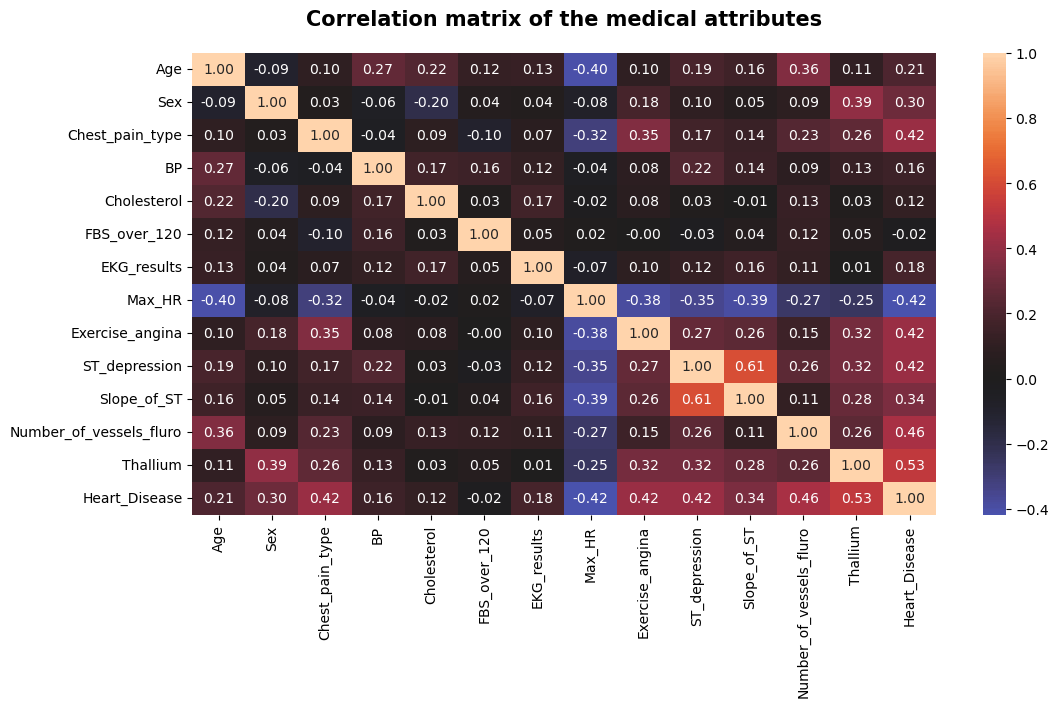

In [5]:
correlation_mat = df.corr()

plt.figure(figsize = (12, 6))
plt.title("Correlation matrix of the medical attributes", fontweight = "bold", pad = 20,  fontsize = 15)
sns.heatmap(correlation_mat, annot = True, fmt = ".2f", center = 0, linecolor = "white")
plt.show()

## Further plotting of the important relationships:

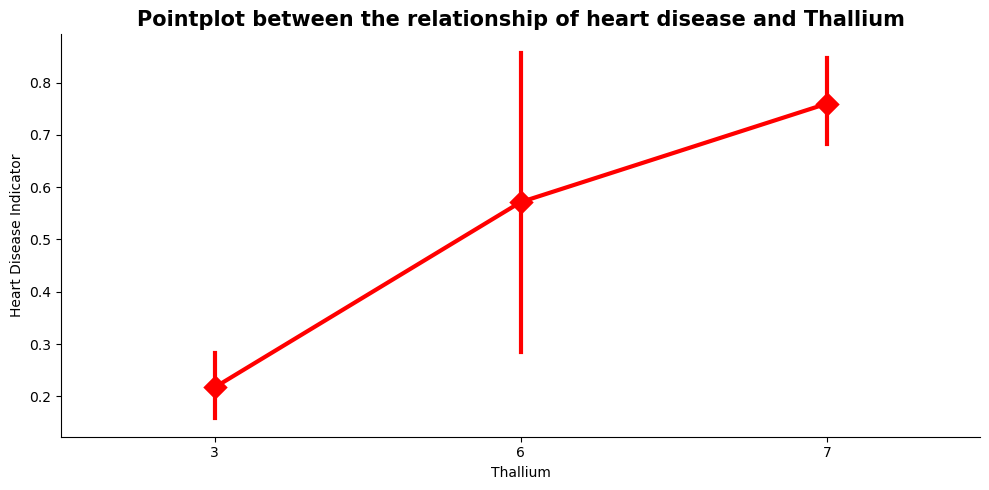

In [6]:
plt.figure(figsize = (10, 5))
plt.title("Pointplot between the relationship of heart disease and Thallium", fontweight = "bold", fontsize = 15)
sns.pointplot(x='Thallium', y ='Heart_Disease', data=df, color = "red",  markers='D', markersize=10, linewidth = 3)
plt.ylabel("Heart Disease Indicator")
plt.tight_layout()
sns.despine()
plt.show()

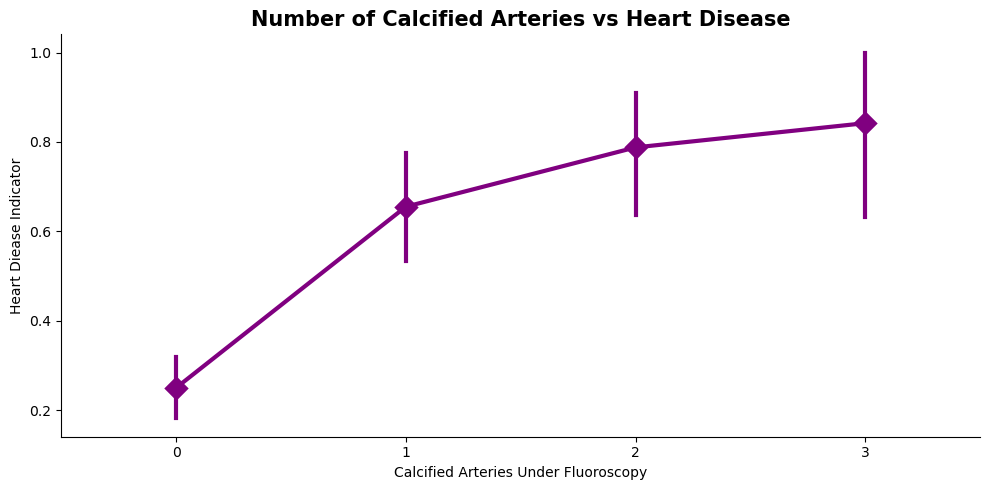

In [7]:
plt.figure(figsize = (10, 5))
sns.pointplot(data=df, x='Number_of_vessels_fluro', y='Heart_Disease', errorbar='ci', markers='D', markersize=10, linewidth=3,
              color='purple') 
plt.title('Number of Calcified Arteries vs Heart Disease', fontweight = "bold", fontsize = 15)
plt.xlabel("Calcified Arteries Under Fluoroscopy")
plt.ylabel("Heart Diease Indicator")
plt.tight_layout()
sns.despine()

plt.savefig("calc_vs_CAD.png", 
            dpi=300,           # High resolution
            bbox_inches='tight',  # Remove whitespace
            facecolor='white')    # Background color
plt.show()

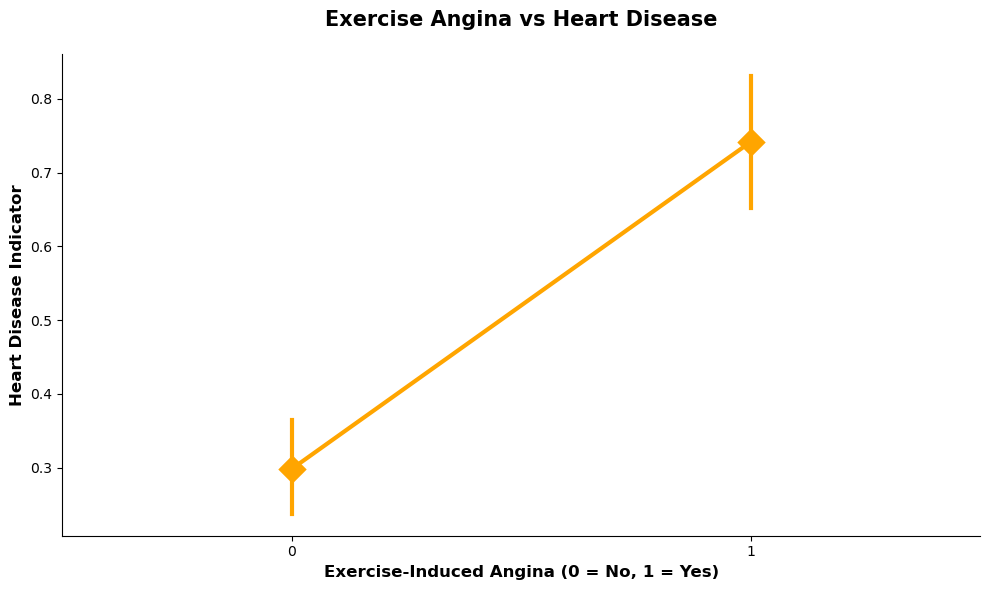

In [8]:
plt.figure(figsize=(10, 6))
sns.pointplot(df, x='Exercise_angina', y='Heart_Disease', errorbar='ci',markers='D', markersize=12, linewidth=3, color='Orange')
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)', fontsize=12, fontweight='bold')
plt.ylabel('Heart Disease Indicator', fontsize=12, fontweight='bold')
plt.title('Exercise Angina vs Heart Disease', fontsize=15, fontweight='bold', pad=20)
sns.despine()
plt.tight_layout()
plt.show()

### Training-Test Split

In [9]:
X = df.drop(("Heart_Disease"), axis = 1)
y = df["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease
115,49,0,2,134,271,0,0,162,0,0.0,2,0,3,0
33,59,1,4,170,326,0,2,140,1,3.4,3,0,7,1
184,53,1,3,130,246,1,2,173,0,0.0,1,3,3,0
142,50,1,3,140,233,0,0,163,0,0.6,2,1,7,1
197,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0


In [10]:
X.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart_Disease, dtype: int64

# Logistic Regression

Fitting a Logistic Regression model to classify heart disease, by taking important medical attributes from the exploratory data analysis.

In [12]:
model = logit("Heart_Disease ~ Thallium + Exercise_angina + Number_of_vessels_fluro", data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.436628
         Iterations 6


In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart_Disease   No. Observations:                  216
Model:                          Logit   Df Residuals:                      212
Method:                           MLE   Df Model:                            3
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.3669
Time:                        11:50:25   Log-Likelihood:                -94.312
converged:                       True   LL-Null:                       -148.97
Covariance Type:            nonrobust   LLR p-value:                 1.541e-23
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.7121      0.527     -7.037      0.000      -4.746      -2.678
Thallium                    0.4896      0.095      5.177      0.000       0.304       0.675
Exercise_angina             1.6306      0.386      4.219      0.000       0.873       2.388
Number_of_vessels_fluro     0.9443      0.210      4.498      0.000       0.533       1.356
===========================================================================================
"""

# Predictions:

We take a cut-off of 0.5 as the probability to seperate the classes.

In [14]:
cutoff = 0.40

In [15]:
predictions = model.predict(X_test)

df_testing = pd.concat([X_test, y_test], axis = 1)

df_testing = df_testing.assign(fitted = predictions)
df_testing["Predicted_class"] = np.where(df_testing["fitted"] > cutoff, 1, 0)
df_testing.head()

,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_of_ST,Number_of_vessels_fluro,Thallium,Heart_Disease,fitted,Predicted_class
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7,1,0.659154,1
116,46,1,4,120,249,0,2,144,0,0.8,1,0,7,1,0.429294,1
79,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,0.095937,0
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3,0,0.095937,0
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3,0,0.095937,0


# Evaluating the performance of the model:

In [16]:
predictions = df_testing["Predicted_class"]
confusion_mat = confusion_matrix(df_testing["Heart_Disease"], predictions)

## Visualising the confusion matrix:

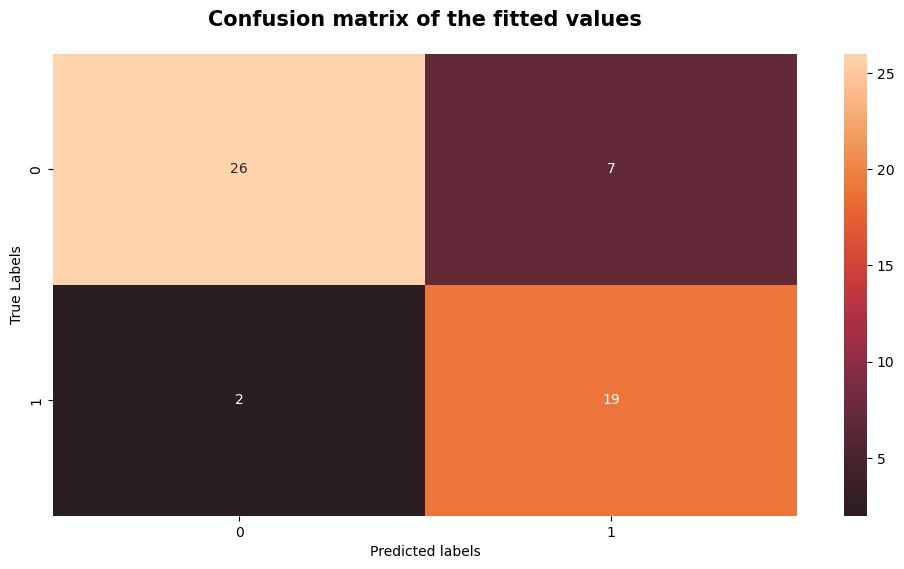

In [17]:
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_mat, annot = True,  center = 0, linecolor = "white")
plt.title("Confusion matrix of the fitted values", fontweight = "bold", fontsize = 15, pad = 20)
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
print(classification_report(df_testing["Heart_Disease"], predictions))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.73      0.90      0.81        21

    accuracy                           0.83        54
   macro avg       0.83      0.85      0.83        54
weighted avg       0.85      0.83      0.84        54



# ROC Curve:

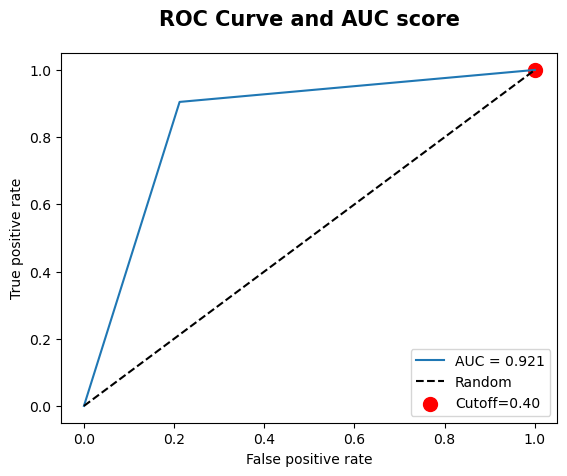

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, df_testing["fitted"]):.3f}')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve and AUC score", fontweight = "bold", fontsize = 15, pad = 20)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
idx = np.argmin(np.abs(thresholds - cutoff))
plt.scatter(fpr[idx], tpr[idx], c='red', s=100, label=f'Cutoff={cutoff:.2f}')
plt.legend(); 
plt.show()

Our AUC score remains satisfactory.

The adjusting of our model threshold from 0.5 sacrifised some of the model precision, but yielded a greater recall for predicting our true labels. This threshold shifting also enabled us to minimise the false negative rate, since this is vital. It is more crucial (especially in a medical model) to minimise the number of people that were incorrectly predicted to have CAD, then to have false alarms. 

Ultimately, this adjustment helps us save more lives and allows the model to compete with medical standards. Thus, this model competes better than standard ECG sensitivity (which sits at about 60-70%).
